In [1]:
# install our package
! pip install .

Processing /Users/zhl/Desktop/STA663/663-Final-Project
  Created wheel for Sinkhorn-663: filename=Sinkhorn_663-0.1-cp38-cp38-macosx_10_14_x86_64.whl size=73342 sha256=52b0af48c4a203be783cc7a44bc91953bea5672d21b79e32a8189f8c2e2614ab
  Stored in directory: /Users/zhl/Library/Caches/pip/wheels/1a/76/06/b0a69c1679d15dab7ce9e0bf10f4156709ee008b80382a1721
Successfully built Sinkhorn-663
  Attempting uninstall: Sinkhorn-663
    Found existing installation: Sinkhorn-663 0.1
    Uninstalling Sinkhorn-663-0.1:
      Successfully uninstalled Sinkhorn-663-0.1
You should consider upgrading via the '/Users/zhl/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [145]:
import Sinkhorn_663 as sh

In [2]:
from Sinkhorn_663 import Sinkhorn, log_domain_sinkhorn_2, Sinkhorn_numba, Sinkhorn_numba_parallel
from Sinkhorn_663 import sample_to_prob_vec, sample_to_prob_vec_nD
from Sinkhorn_663.image import cost_mat, flatten
from Skh_cpp import Sinkhorn_cpp
import numpy as np
import matplotlib.pyplot as plt

# Applications to real data sets

According to the requirement, we also find one other real-world data set not in the original paper and test it. Because optimal transport distances are computed for theoretical probability measures, it's hard to find real data sets which can directly use this method and describe the result. Therefore, we decide to use image data, distances between image matrix can be interpreted as the difference between images. The image data we choose is [CalTech 101 Silhouettes Data Set](https://people.cs.umass.edu/~marlin/data.shtml). According to the description of this data, each image in the CalTech 101 data set includes a high-quality polygon outline of the primary object in the scene. The outline is rendered as a filled, black polygon on a white background. Many object classes exhibit silhouettes that have distinctive class-specific features.

In [7]:
import scipy.io
import pandas as pd

In [316]:
silhouettes = scipy.io.loadmat('data/silhouettes.mat')
img_mat = silhouettes.get('X')

In [355]:
pixel = 28
plane_row = [5,6,10]
umbrella_row = [8121,8123,8124]
cat_row = [8505,8507,8515]
compare_img_mat = [img_mat[i,].reshape(pixel,pixel).T for i in plane_row+umbrella_row+cat_row]

plane_idx = ['plane' + str(i) for i in range(1,4)]
umbrella_idx = ['umbrella' + str(i) for i in range(1,4)]
cat_idx = ['cat' + str(i) for i in range(1,4)]
all_idx = plane_idx + umbrella_idx + cat_idx

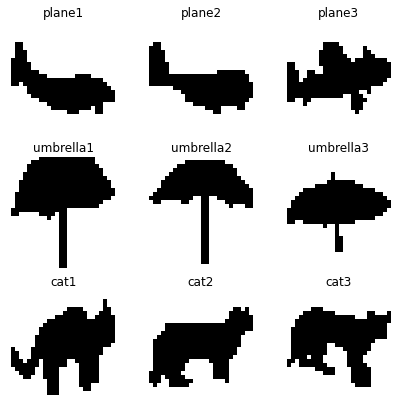

In [356]:
fig, axes = plt.subplots(nrows=3,ncols=3, figsize = (7,7))
for p in range(9):
    i = p//3
    j = p%3
    axes[i,j].imshow(compare_img_mat[p], cmap='gray')
    axes[i,j].axis('off')
    axes[i,j].set_title(all_idx[p])
pass

In [359]:
M_img = sh.image.cost_mat(pixel)
compare_img_flat = sh.image.flatten(compare_img_mat)
maxiter = 2000
tol = 1e-4
lamda = 20

In [361]:
compare_result = np.zeros([9,9])
for i in range(9):
    for j in range(9):
        compare_result[i,j] = Sinkhorn(compare_img_flat[i], compare_img_flat[j], M_img, lamda, tol, maxiter)[0]
compare_result
pd.DataFrame(compare_result, index=all_idx, columns=all_idx)

,plane1,plane2,plane3,umbrella1,umbrella2,umbrella3,cat1,cat2,cat3
plane1,7.507926e-09,4.523422e-01,1.608117e+00,4.769775e+00,3.268142e+00,1.740223e+00,2.463571e+00,2.088160e+00,2.211377e+00
plane2,4.546959e-01,7.518364e-09,1.481859e+00,4.563910e+00,3.018078e+00,1.607757e+00,2.266018e+00,2.090295e+00,2.045098e+00
plane3,1.610802e+00,1.487342e+00,7.336090e-09,3.738838e+00,2.538182e+00,7.683372e-01,1.402282e+00,9.171976e-01,1.160632e+00
umbrella1,4.770389e+00,4.565164e+00,3.753368e+00,7.387101e-09,1.633380e+00,3.162028e+00,4.015444e+00,3.956618e+00,2.950260e+00
umbrella2,3.301619e+00,3.055526e+00,2.536706e+00,1.635169e+00,7.381938e-09,1.924763e+00,2.882613e+00,3.005538e+00,2.174834e+00
umbrella3,1.758107e+00,1.623297e+00,7.626092e-01,3.156808e+00,1.915702e+00,7.464357e-09,1.834865e+00,1.387057e+00,8.668681e-01
cat1,2.465737e+00,2.267632e+00,1.399046e+00,4.005918e+00,2.877571e+00,1.833016e+00,7.137039e-09,1.580422e+00,1.857818e+00
cat2,2.087524e+00,2.089375e+00,9.212360e-01,3.931735e+00,3.005854e+00,1.384606e+00,1.573244e+00,7.285377e-09,1.359427e+00
cat3,2.210328e+00,2.051442e+00,1.168856e+00,2.924648e+00,2.173773e+00,8.672628e-01,1.853890e+00,1.358097e+00,7.228885e-09
